In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=1200, noise=0.2)

In [3]:
data = {'x1': x[:,0], 'x2': x[:,1], 'y': y}
df = pd.DataFrame(data)
df.head(2)

,x1,x2,y
0,0.595729,0.665637,0
1,0.858730,-0.544457,1


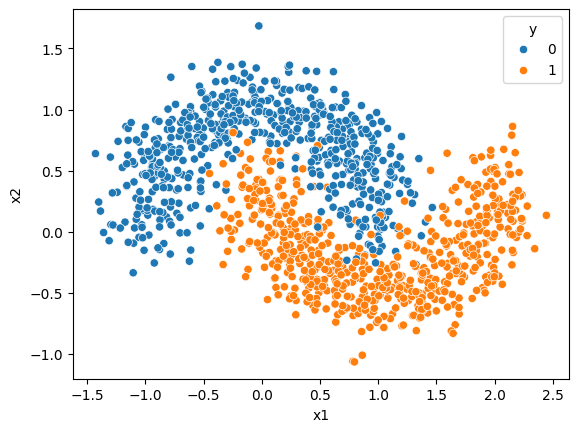

In [4]:
sns.scatterplot(data=df, x='x1', y='x2', hue='y')
plt.show()

In [5]:
x = df.iloc[:, :-1]
y = df['y']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [8]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC()
knn = KNeighborsClassifier()
gb = GaussianNB()

In [9]:
model = {
    'lr' : lr,
    'dt' : dt,
    'svm' : svm,
    'knn' : knn,
    'gb' : gb
}

In [10]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [11]:
def train_regression(cls, x_train, x_test, y_train, y_test):
    cls.fit(x_train, y_train)
    y_pred = cls.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    recall = recall_score(y_test, y_pred)*100
    precision = precision_score(y_test, y_pred)*100
    return accuracy, recall, precision

In [12]:
for name, cls in model.items():
    acc, rec, pre = train_regression(cls, x_train, x_test, y_train, y_test)
    print(f"For {name}:, acc - {acc:.2f}, rec - {rec:.2f}, pre - {pre:.2f}")

For lr:, acc - 85.00, rec - 82.91, pre - 85.84
For dt:, acc - 95.83, rec - 96.58, pre - 94.96
For svm:, acc - 96.25, rec - 95.73, pre - 96.55
For knn:, acc - 97.08, rec - 97.44, pre - 96.61
For gb:, acc - 85.42, rec - 82.91, pre - 86.61


# Bagging Meta Estimator

In [13]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [18]:
bg = BaggingClassifier(estimator=KNeighborsClassifier(),n_estimators=100)
bg.fit(x_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=100)

In [19]:
acc, rec, pre = train_regression(bg, x_train, x_test, y_train, y_test)
print(f"For {name}:, acc - {acc:.2f}, rec - {rec:.2f}, pre - {pre:.2f}")

For gb:, acc - 97.08, rec - 97.44, pre - 96.61


# Random Forest

In [20]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [22]:
acc, rec, pre = train_regression(rf, x_train, x_test, y_train, y_test)
print(f"For {rf}:, acc - {acc:.2f}, rec - {rec:.2f}, pre - {pre:.2f}")

For RandomForestClassifier():, acc - 95.83, rec - 95.73, pre - 95.73
